# Predicting Buying Session - EDA

## Init

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns

In [2]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
df = pd.read_csv('online_shoppers_intention.csv')

In [4]:
num_feats = ['Administrative', 'Administrative_Duration', 'Informational', 
             'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 
             'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

In [5]:
obj_feats = ['Month', 'OperatingSystems', 'Browser', 'Region',
             'TrafficType', 'VisitorType']
df[obj_feats] = df[obj_feats].astype('object')

cat_feats = ['Month', 'OperatingSystems', 'Browser', 'Region',
             'TrafficType', 'VisitorType', 'Weekend']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  object 
 12  Browser                  12330 non-null  object 
 13  Region                   12330 non-null  object 
 14  TrafficType           

## Target

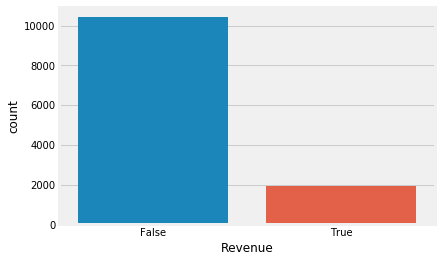

In [7]:
sns.countplot(df['Revenue'])

In [8]:
df['Revenue'].value_counts().apply(lambda x: str(round(x/df['Revenue'].value_counts().sum()*100, 2))+'%')

False    84.53%
True     15.47%
Name: Revenue, dtype: object

## Features

### Numerical

#### Distributions

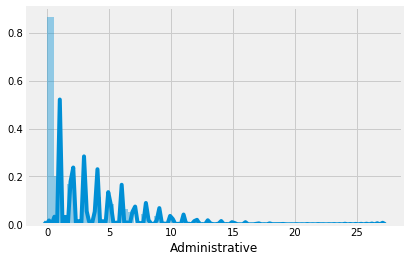

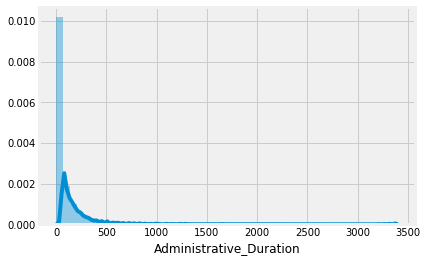

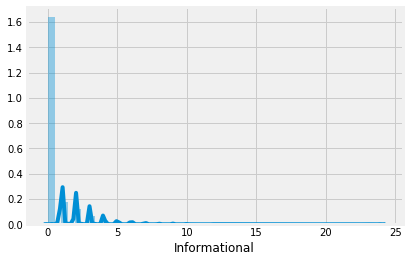

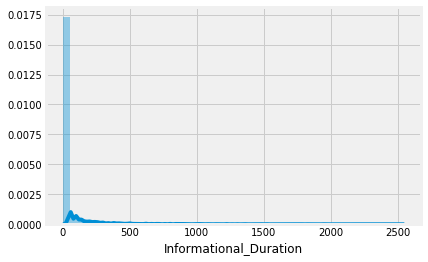

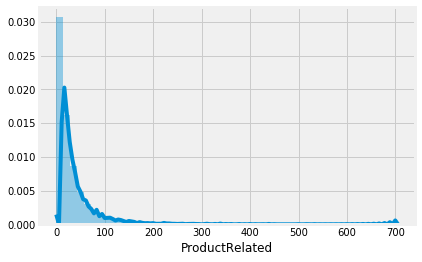

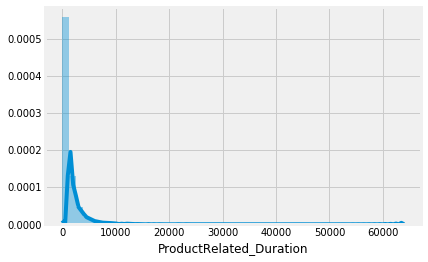

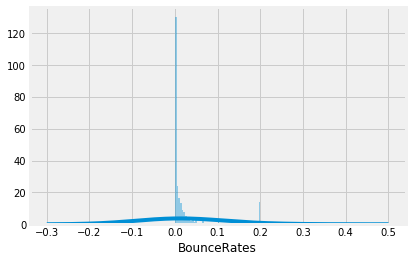

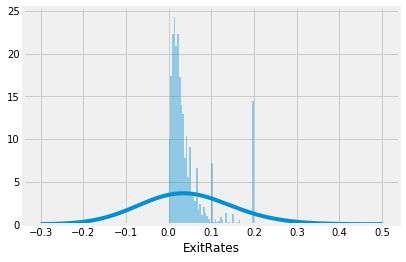

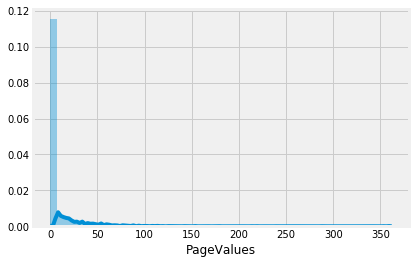

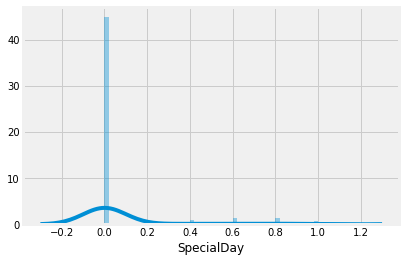

In [25]:
for column in num_feats:
    sns.distplot(df[column], kde_kws={'bw':0.1})
    plt.show()

#### Correlations

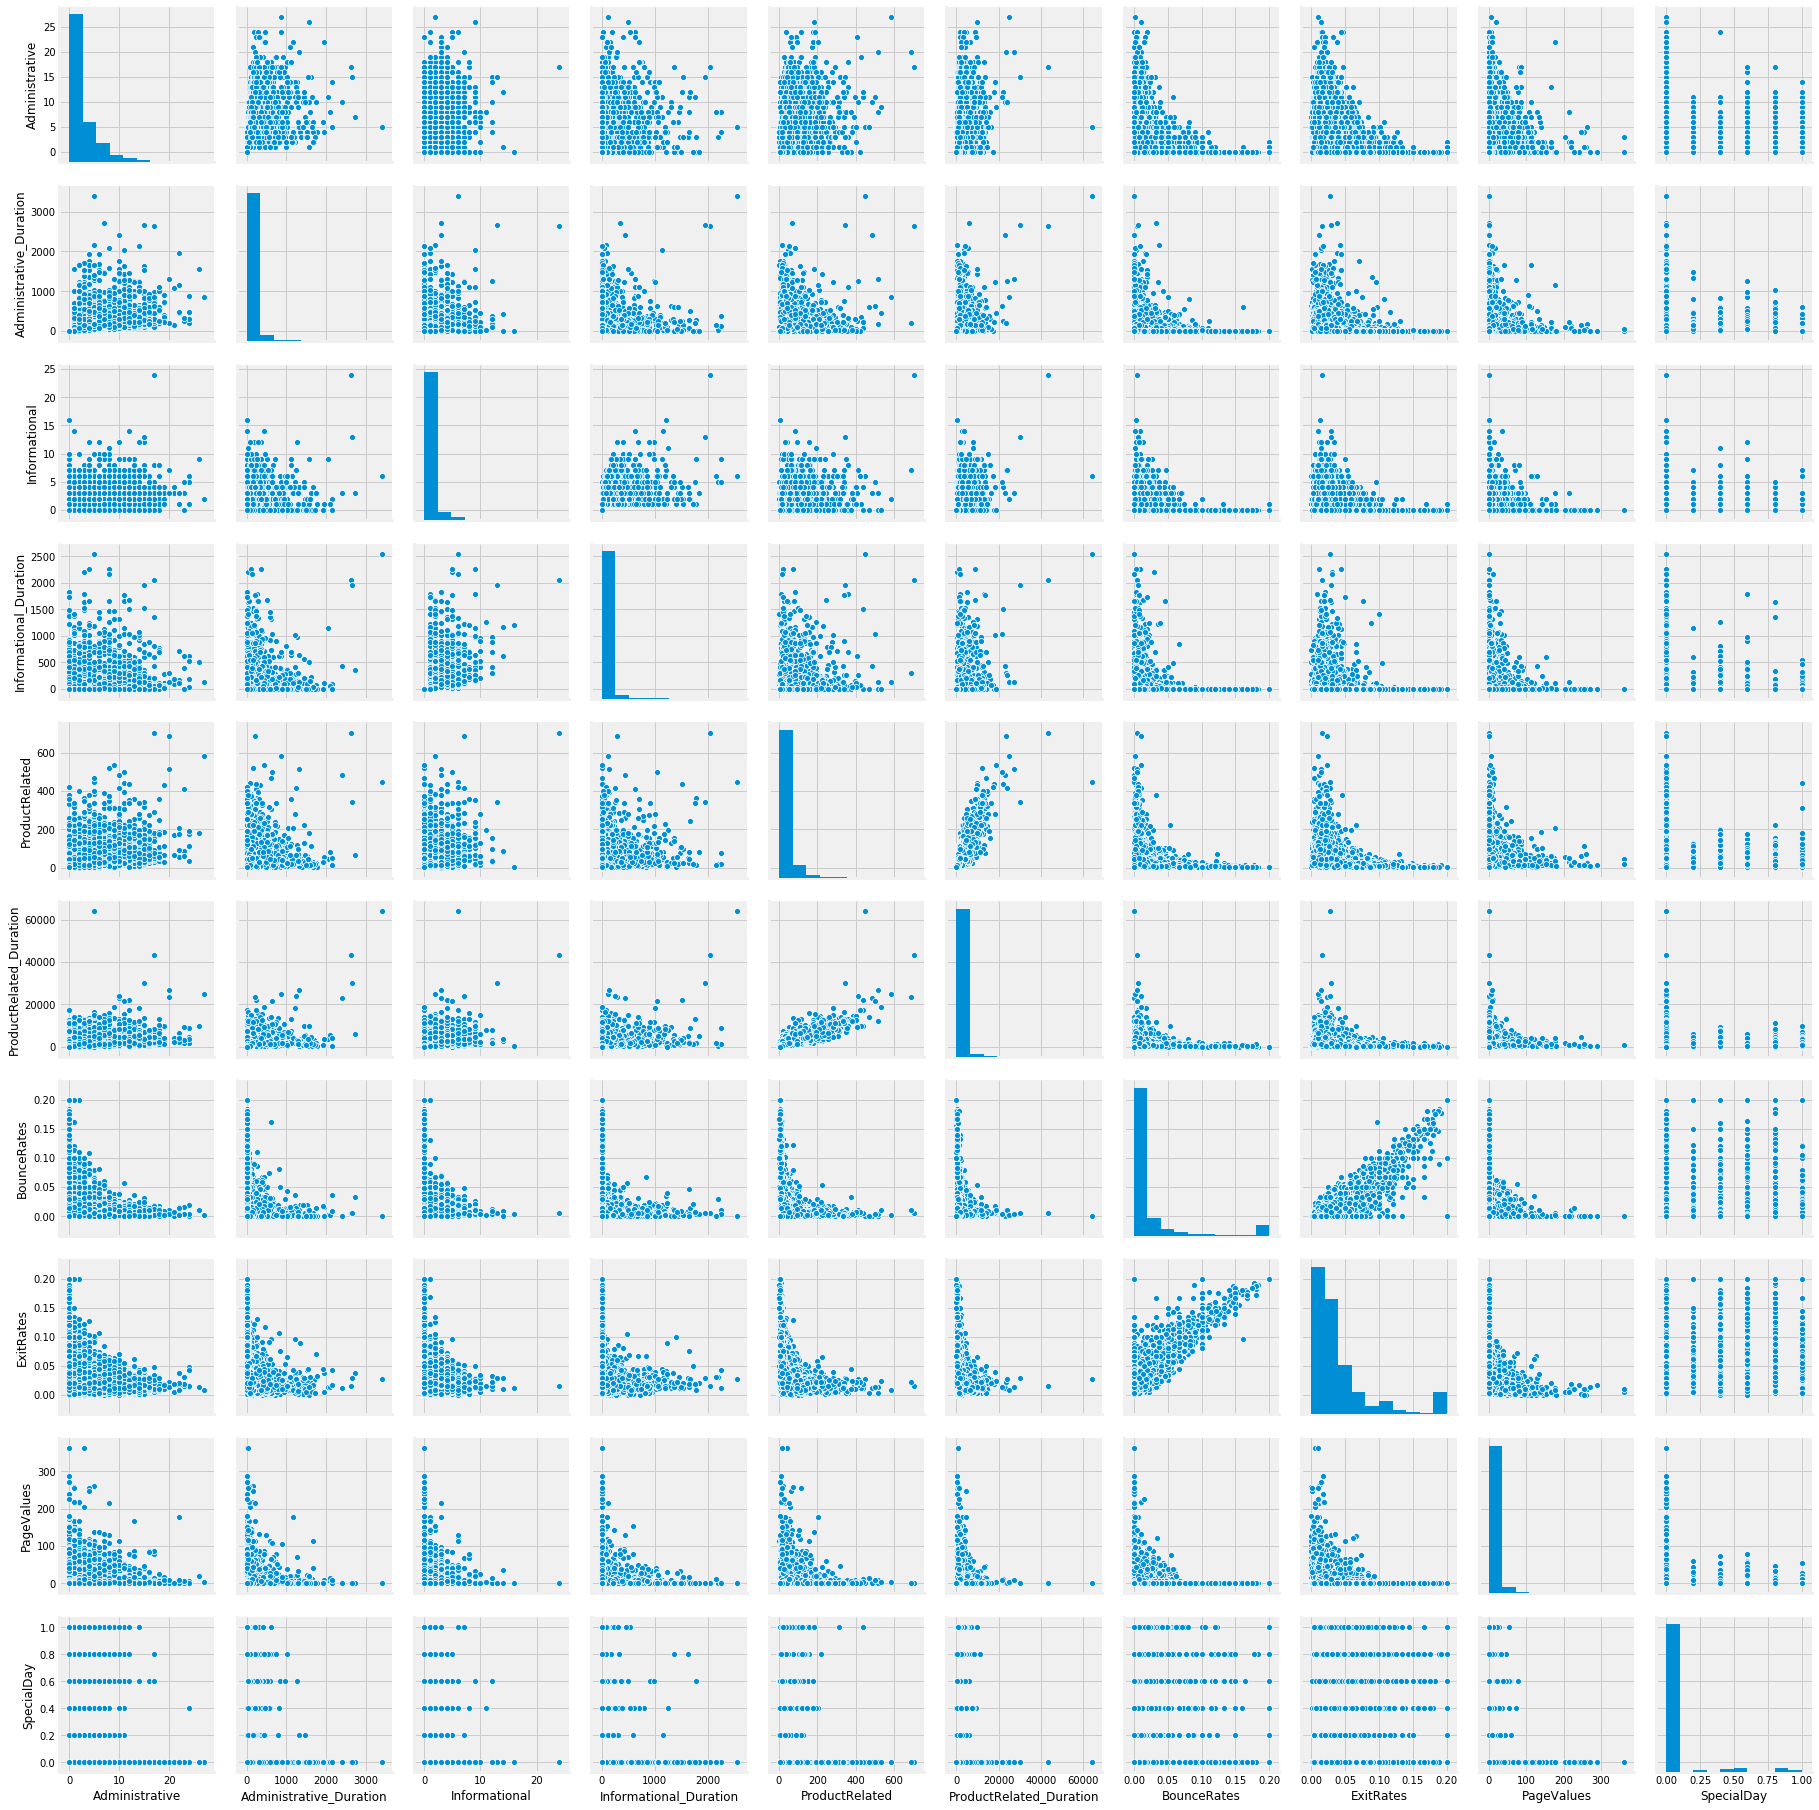

In [10]:
sns.pairplot(df[num_feats])

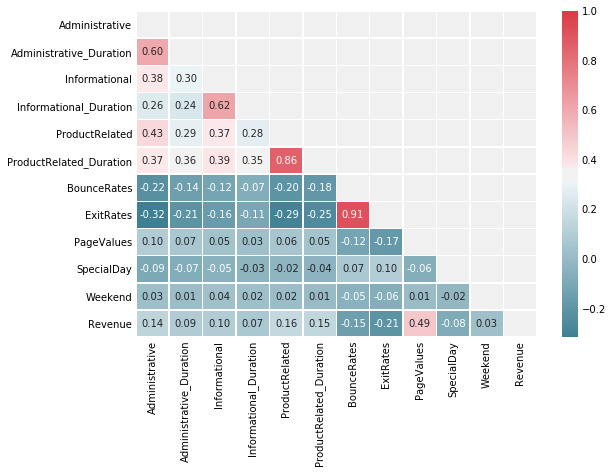

In [11]:
corr = df.corr('pearson')
fig, ax = plt.subplots(figsize=(8, 6))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

Administrative/Informational/ProductRelated pageview <--> its counterpart duration is HIGHLY correlated (60% - 86%)

Also note: ExitRates <--> BounceRates (90%!)

It's natural for PageValues to be correlated to Revenue (49%), since visitor will visit billing pages before purchase

### Categorical

#### Distributions

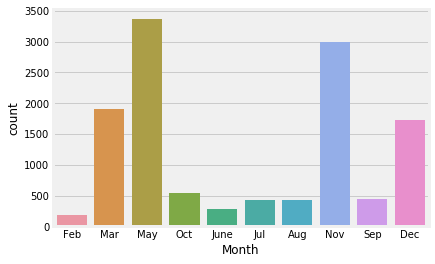

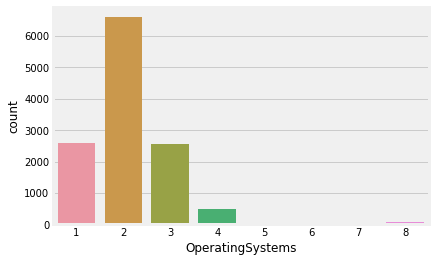

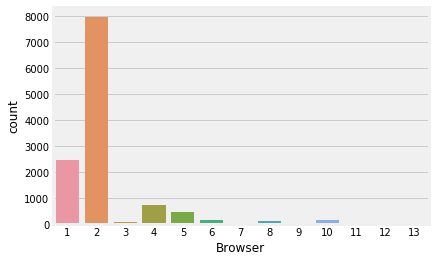

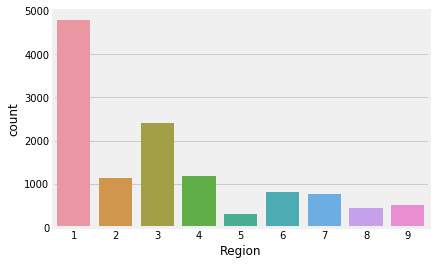

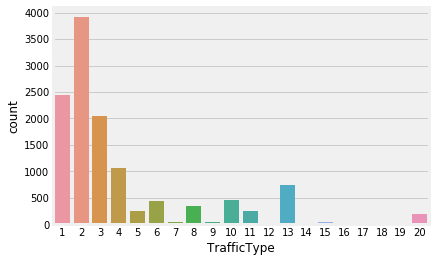

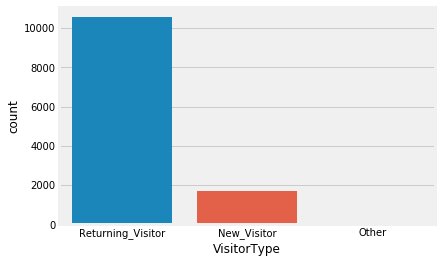

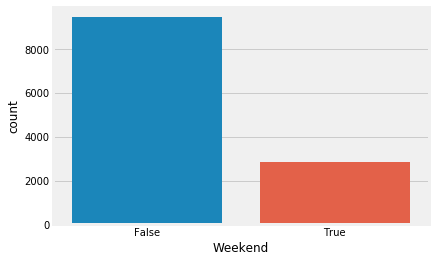

In [12]:
for feat in cat_feats:
    sns.countplot(df[feat])
    plt.show()

In [13]:
def composition(col):
    return df[col].value_counts().apply(lambda x: str(round(x/df[col].value_counts().sum()*100, 2))+'%')

In [28]:
for feat in cat_feats:
    print(feat)
    print(composition(feat))
    print('\n')

Month
May     27.28%
Nov     24.31%
Mar     15.47%
Dec     14.01%
Oct      4.45%
Sep      3.63%
Aug      3.51%
Jul       3.5%
June     2.34%
Feb      1.49%
Name: Month, dtype: object


OperatingSystems
2    53.54%
1    20.97%
3    20.72%
4     3.88%
8     0.64%
6     0.15%
7     0.06%
5     0.05%
Name: OperatingSystems, dtype: object


Browser
2     64.57%
1     19.97%
4      5.97%
5      3.79%
6      1.41%
10     1.32%
8      1.09%
3      0.85%
13     0.49%
7       0.4%
12     0.08%
11     0.05%
9      0.01%
Name: Browser, dtype: object


Region
1    38.77%
3    19.49%
4     9.59%
2     9.21%
6     6.53%
7     6.17%
9     4.14%
8     3.52%
5     2.58%
Name: Region, dtype: object


TrafficType
2     31.74%
1     19.88%
3     16.64%
4      8.67%
13     5.99%
10     3.65%
6       3.6%
8      2.78%
5      2.11%
11      2.0%
20     1.61%
9      0.34%
7      0.32%
15     0.31%
19     0.14%
14     0.11%
18     0.08%
16     0.02%
12     0.01%
17     0.01%
Name: TrafficType, dtype: object


Vi

## Freeform

### Numerical

The average buying visitors:
- Are ~2x more likely to view more pages and stays in session longer
- 5x less likely to bounce.
- Have 14x larger page values. --> can be a natural indicator of purchase

In [30]:
df.groupby('Revenue').agg('mean')[num_feats]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
Revenue,,,,,,,,,,
False,2.117732,73.740111,0.451833,30.236237,28.714642,1069.987809,0.025317,0.047378,1.975998,0.068432
True,3.393606,119.483244,0.786164,57.611427,48.210168,1876.209615,0.005117,0.019555,27.264518,0.023166


Note that by median values, there's even clearer difference of visitor behavior.
Especially notable is product-related page and duration, bounce rates, and page values.
Seems like page values can be a proxy of cart amount.

In [29]:
df.groupby('Revenue').agg('median')[num_feats]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
Revenue,,,,,,,,,,
False,0,0.000000,0,0.0,16,510.19000,0.004255,0.028571,0.000000,0.0
True,2,52.366667,0,0.0,29,1109.90625,0.000000,0.016000,16.758134,0.0


Number of pages viewed is moderately (+) correlated to duration for all type of pages.
Bounce rate & exit rate are strongly (+) correlated.
Seems like there are more outliers within non-buying group here (more diffused markers).

In [33]:
fig = px.scatter(df, x="Administrative_Duration", y="Administrative", color="Revenue")
fig.show()

fig = px.scatter(df, x="Informational_Duration", y="Informational", color="Revenue")
fig.show()

fig = px.scatter(df, x="ProductRelated_Duration", y="ProductRelated", color="Revenue")
fig.show()

fig = px.scatter(df, x="BounceRates", y="ExitRates", color="Revenue")
fig.show()

### TrafficType

In [20]:
rev_true_labels = [i for i in df[df['Revenue']==True]['TrafficType'].value_counts().sort_index().index]
rev_true_values = [i for i in df[df['Revenue']==True]['TrafficType'].value_counts().sort_index().values]
rev_false_labels = [i for i in df[df['Revenue']==False]['TrafficType'].value_counts().sort_index().index]
rev_false_values = [i for i in df[df['Revenue']==False]['TrafficType'].value_counts().sort_index().values]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, 
                    cols=2, 
                    specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['Purchased', 'Did not purchase']
                   )
fig.add_trace(go.Pie(labels=rev_true_labels, 
                     values=rev_true_values, 
                     name="1", 
                     scalegroup='one',
                    ),
              1, 1
             )
fig.add_trace(go.Pie(labels=rev_false_labels, 
                     values=rev_false_values, 
                     name="0", 
                     scalegroup='one'),
              1, 2
             )

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="From which channels do visitors come from?",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='', x=0.18, y=0.5, font_size=10, showarrow=False),
                 dict(text='', x=0.82, y=0.5, font_size=10, showarrow=False)])
fig.show()

In [19]:
# Supporting earlier point about page values being natural indicators of purchase

pd.crosstab(df.TrafficType, 
            df.Revenue,
            values=df.PageValues,
            aggfunc='median').round(2).sort_values(by=True, ascending=False)

Revenue,False,True
TrafficType,,
19,0.0,56.36
7,0.0,39.31
20,0.0,37.52
9,0.0,30.25
14,0.0,27.77
4,0.0,24.29
6,0.0,20.97
5,0.0,20.47
2,0.0,17.22


In [67]:
def generate_stats(cat_feat):
    '''Function to generate summary dataframe
       cat_feat = name of categorical feature, string'''
    
    gb_rates = df.groupby(cat_feat).agg('mean')[[
        'BounceRates', 'PageValues']]

    ct_conversion = pd.crosstab(df[cat_feat], 
                                df['Revenue'],
                                margins=True, 
                                margins_name="TotalSessions"
    )
    ct_conversion['ConversionRates'] = round(ct_conversion[True]/ct_conversion['TotalSessions']*100, 2)

    core_stats = pd.DataFrame(data=zip(gb_rates.index,
                                          round(gb_rates.BounceRates*100, 2),
                                          round(gb_rates.PageValues*100, 2),
                                          ct_conversion.ConversionRates,
                                          ct_conversion.TotalSessions),
                                 columns = [cat_feat,
                                            'BounceRates',
                                            'PageValues',
                                            'ConversionRates',
                                            'TotalSessions'])
    core_stats['ShareSize'] = round(core_stats.TotalSessions/sum(core_stats.TotalSessions)*100,2)
    
    return core_stats

generate_stats('TrafficType')

,TrafficType,BounceRates,PageValues,ConversionRates,TotalSessions,ShareSize
0,1,3.23,345.51,10.69,2451,19.88
1,2,0.85,830.44,21.65,3913,31.74
2,3,3.33,327.60,8.77,2052,16.64
3,4,1.63,704.31,15.43,1069,8.67
4,5,0.95,771.25,21.54,260,2.11
5,6,2.21,507.62,11.94,444,3.60
6,7,0.78,1356.73,30.00,40,0.32
7,8,1.15,1030.24,27.70,343,2.78
8,9,2.63,381.86,9.52,42,0.34
9,10,1.66,620.82,20.00,450,3.65


Visitors coming from channel 1, 2, 3, and 4 make up 77% of total sessions. The rest (23%) are contributed by remaining 12 small channels.

Intuitively busier channels would contribute larger sales & conversion and less bounce rates. This data can be used by marketers to evaluate success of investments to each channel.
- Channel 1, 3, 4: Despite attracting many visitors, conversion rates 

### Month

In [68]:
generate_stats('Month')

,Month,BounceRates,PageValues,ConversionRates,TotalSessions,ShareSize
0,Aug,1.82,593.81,17.55,433,3.51
1,Dec,2.01,683.32,12.51,1727,14.01
2,Feb,4.70,89.04,1.63,184,1.49
3,Jul,2.47,410.44,15.28,432,3.50
4,June,3.51,339.14,10.07,288,2.34
5,Mar,2.17,395.97,10.07,1907,15.47
6,May,2.69,543.16,10.85,3364,27.28
7,Nov,1.93,712.94,25.35,2998,24.31
8,Oct,1.18,864.56,20.95,549,4.45
9,Sep,1.22,755.68,19.20,448,3.63


In [71]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig = go.Figure()
fig.add_trace(go.Scatter(x=months, 
                         y=[i for i in df[df['Revenue']==True]['Month'].value_counts().reindex(months).values], 
                         name = 'Purchased',
                         line=dict(color='royalblue', width=4)))
fig.add_trace(go.Scatter(x=months, 
                         y=[i for i in df[df['Revenue']==False]['Month'].value_counts().reindex(months).values], 
                         name='Did not purchase',
                         line=dict(color='firebrick', width=4)
))

fig.update_layout(title='Buying Behaviour Related to Month',
                   xaxis_title='Month',
                   yaxis_title='Sessions')


fig.show()

In [84]:
pd.crosstab(df.Month, df.SpecialDay)

SpecialDay,0.0,0.2,0.4,0.6,0.8,1.0
Month,,,,,,
Aug,433,0,0,0,0,0
Dec,1727,0,0,0,0,0
Feb,105,15,21,19,19,5
Jul,432,0,0,0,0,0
June,288,0,0,0,0,0
Mar,1907,0,0,0,0,0
May,2192,163,222,332,306,149
Nov,2998,0,0,0,0,0
Oct,549,0,0,0,0,0


### Region

In [85]:
generate_stats('Region')

,Region,BounceRates,PageValues,ConversionRates,TotalSessions,ShareSize
0,1,2.21,590.21,16.13,4780,38.77
1,2,2.29,590.66,16.55,1136,9.21
2,3,2.25,534.43,14.52,2403,19.49
3,4,2.32,580.39,14.81,1182,9.59
4,5,2.07,925.08,16.35,318,2.58
5,6,2.37,480.36,13.91,805,6.53
6,7,2.04,625.96,15.64,761,6.17
7,8,1.92,425.79,12.90,434,3.52
8,9,2.17,894.26,16.83,511,4.14


In [22]:
regions=df["Region"].value_counts()

# pie plot
fig = px.pie(regions,
             values=regions.values,
             names=regions.index,
             title="From what regions do visitors come from?",
             color_discrete_sequence=px.colors.diverging.curl)
fig.update_traces(rotation=-90, textinfo="percent+label")
fig.show()

### OS & Browser

In [135]:
generate_stats('OperatingSystems')

,OperatingSystems,BounceRates,PageValues,ConversionRates,TotalSessions,ShareSize
0,1,2.71,519.49,14.66,2585,20.97
1,2,1.66,679.11,17.50,6601,53.54
2,3,3.31,343.32,10.49,2555,20.72
3,4,1.23,815.02,17.78,478,3.88
4,5,1.31,436.48,16.67,6,0.05
5,6,3.70,866.29,10.53,19,0.15
6,7,3.99,0.00,14.29,7,0.06
7,8,3.38,1897.55,21.52,79,0.64


In [137]:
generate_stats('Browser')

,Browser,BounceRates,PageValues,ConversionRates,TotalSessions,ShareSize
0,1,2.62,550.63,14.83,2462,19.97
1,2,2.14,571.68,15.36,7961,64.57
2,3,3.76,258.22,4.76,105,0.85
3,4,1.72,672.37,17.66,736,5.97
4,5,1.96,798.06,18.42,467,3.79
5,6,1.85,530.50,11.49,174,1.41
6,7,2.13,344.97,12.24,49,0.40
7,8,3.11,523.24,15.56,135,1.09
8,9,2.00,0.00,0.00,1,0.01
9,10,1.49,706.45,19.63,163,1.32


In [140]:
combo = pd.crosstab(df.OperatingSystems, df.Browser, margins=True)
combo

Browser,1,2,3,4,5,6,7,8,9,10,11,12,13,All
OperatingSystems,,,,,,,,,,,,,,
1,2153,280,0,3,5,4,0,135,0,3,0,0,2,2585
2,16,5059,1,732,430,155,39,0,0,160,0,4,5,6601
3,1,2416,104,0,6,11,9,0,1,0,0,6,1,2555
4,279,174,0,1,21,3,0,0,0,0,0,0,0,478
5,0,0,0,0,0,0,0,0,0,0,6,0,0,6
6,0,15,0,0,3,0,1,0,0,0,0,0,0,19
7,7,0,0,0,0,0,0,0,0,0,0,0,0,7
8,6,17,0,0,2,1,0,0,0,0,0,0,53,79
All,2462,7961,105,736,467,174,49,135,1,163,6,10,61,12330


In [155]:
fig = go.Figure(data=go.Heatmap(
                   z=combo.iloc[:-1,:-1].where(combo>0).values,
                   x=[str(i) for i in range(1, 14)],
                   y=[str(i) for i in range(1, 9)],
                   hoverongaps = False,
 colorscale='YlGnBu'))
fig.show()

### VisitorType

In [86]:
visitors=df['VisitorType'].value_counts()

# pie plot
fig = px.pie(visitors,
             values=visitors.values,
             names=visitors.index,
             title="What's the composition of our visitors?",
             color_discrete_sequence=px.colors.diverging.Portland)
fig.update_traces(rotation=-90, textinfo="percent+label")
fig.show()

In [96]:
visitors=[i for i in df['VisitorType'].unique()]

fig = go.Figure(data=[
    go.Bar(name='Buy', 
           x=visitors, 
           y=[i for i in df[df['Revenue']==True]['VisitorType'].value_counts().reindex(visitors).values], 
           marker_color='royalblue'
          ),
    go.Bar(name='No buy', 
           x=visitors, 
           y=[i for i in df[df['Revenue']==False]['VisitorType'].value_counts().reindex(visitors).values], 
           marker_color='firebrick'),
    go.Bar(name='All', 
           x=visitors, 
           y=[i for i in df['VisitorType'].value_counts().reindex(visitors).values], 
           marker_color='slategrey')
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

In [90]:
generate_stats('VisitorType')

,VisitorType,BounceRates,PageValues,ConversionRates,TotalSessions,ShareSize
0,New_Visitor,0.53,1077.22,24.91,1694,13.74
1,Other,3.86,1819.18,18.82,85,0.69
2,Returning_Visitor,2.48,500.62,13.93,10551,85.57


Text(0.5, 1.0, 'PageValues of VisitorType')

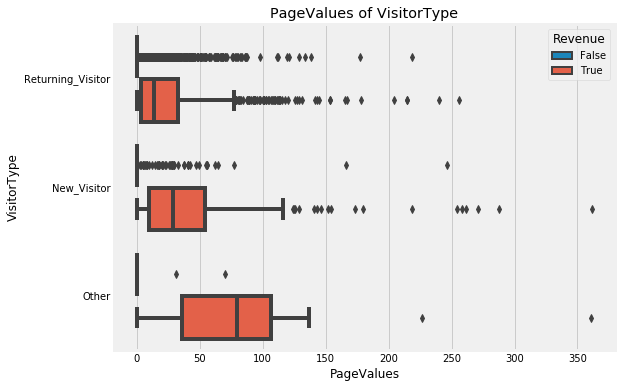

In [94]:
plt.figure(figsize=(8,6))
sns.boxplot(data = df,
            x = 'PageValues',
            y = 'VisitorType',
            hue = 'Revenue'
           )
plt.title('PageValues of VisitorType')

### Weekend

In [97]:
weekend=[i for i in df['Weekend'].unique()]

fig = go.Figure(data=[
    go.Bar(name='Buy', 
           x=weekend, 
           y=[i for i in df[df['Revenue']==True]['Weekend'].value_counts().reindex(weekend).values], 
           marker_color='royalblue'
          ),
    go.Bar(name='No Buy', 
           x=weekend, 
           y=[i for i in df[df['Revenue']==False]['Weekend'].value_counts().reindex(weekend).values], 
           marker_color='firebrick'),
    go.Bar(name='All', 
           x=weekend, 
           y=[i for i in df['Weekend'].value_counts().reindex(weekend).values], 
           marker_color='slategrey'),
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

In [98]:
generate_stats('Weekend')

,Weekend,BounceRates,PageValues,ConversionRates,TotalSessions,ShareSize
0,False,2.34,576.66,14.89,9462,76.74
1,True,1.81,629.40,17.40,2868,23.26


In [133]:
df.groupby('Weekend').agg('median')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Revenue
Weekend,,,,,,,,,,,
False,1,5.0,0,0.0,17,585.089178,0.003279,0.026498,0.0,0.0,False
True,1,19.0,0,0.0,20,650.820833,0.002546,0.023037,0.0,0.0,False


In [132]:
pd.concat([pd.DataFrame(df.pivot_table(index='Weekend').iloc[0]/5),
pd.DataFrame(df.pivot_table(index='Weekend').iloc[1]/2)], axis=1)

,False,True
Administrative,0.453371,1.237273
Administrative_Duration,15.871948,42.815834
BounceRates,0.004687,0.009047
ExitRates,0.008949,0.018774
Informational,0.095709,0.293061
Informational_Duration,6.521327,20.313923
PageValues,1.153314,3.147010
ProductRelated,6.267491,16.515690
ProductRelated_Duration,237.408852,610.078120
Revenue,0.029782,0.086994
